Continued from the result of the [training](./training.ipynb), we test the model.

In [1]:
import numpy as np

from utils import load_data, bf
from QVC import PyquilVariationalClassifier
from pyquil_circuits import PauliFeatureMap, VariationalCircuit

As already shown in the [training script](./training.ipynb), we declare the model.

In [2]:
# Define quantum feature map
qfm = PauliFeatureMap(num_qubits=3, rep=2)
vc = VariationalCircuit(num_qubits=3, rep=2)
qvc = PyquilVariationalClassifier(qfm, vc, bool_ftn=bf, use_bias=False)

Also load the data and the trained parameters.

In [3]:
train_data = np.load('./npy_files/TrainData_zzpfmc12_pyquil.npy')
test_data = np.load('./npy_files/TestData_zzpfmc12_pyquil.npy')
train_labels = np.load('./npy_files/TrainLabels_zzpfmc12_pyquil.npy')
test_labels = np.load('./npy_files/TestLabels_zzpfmc12_pyquil.npy')
opt_param = np.load('./npy_files/Optimal_param_zzpfmc12_qiskit.npy')

qvc.optimal_params = opt_param

Get the test and training accuracies.

In [4]:
test_acc, _, test_correct = qvc.test(test_data, (-1)**test_labels, verbose=True)
train_acc, _, train_correct = qvc.test(train_data, (-1)**train_labels, verbose=True)
print(f"Test accuracy     = {test_acc}")
print(f"Training accuracy = {train_acc}")

Test accuracy     = 0.6190476190476191
Training accuracy = 0.8271604938271605


Plot the classification result of test and training data.


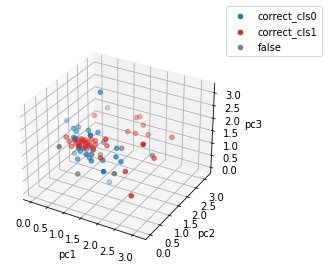

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['tab:blue', 'tab:red', 'tab:gray']
correct_dp_c0 = list()
correct_dp_c1 = list()
false_dp = list()
for i, (dp, l) in enumerate(zip(train_data, train_correct)):
    if l :
        if train_labels[i] == 0:
            correct_dp_c0.append(dp)
        elif train_labels[i] == 1:
            correct_dp_c1.append(dp)
        else:
            print("something went wrong")
            raise ValueError
    else:
        false_dp.append(dp)
correct_dp_c0 = np.array([np.array(d) for d in correct_dp_c0]).swapaxes(0,1)
correct_dp_c1 = np.array([np.array(d) for d in correct_dp_c1]).swapaxes(0,1)
false_dp = np.array([np.array(d) for d in false_dp]).swapaxes(0,1)
ax.scatter(correct_dp_c0[0], correct_dp_c0[1], correct_dp_c0[2],
           c = colors[0],
           label='correct_cls0')
ax.scatter(correct_dp_c1[0], correct_dp_c1[1], correct_dp_c1[2],
           c = colors[1],
           label='correct_cls1')
ax.scatter(false_dp[0], false_dp[1], false_dp[2],
           c = colors[2],
           label='false')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
fig.legend(bbox_to_anchor=(1,1))
plt.savefig('./figures/zzzpfm_c12_class_train.png')

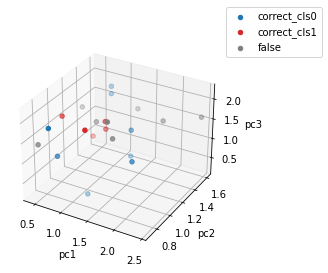

In [14]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
colors = ['tab:blue', 'tab:red', 'tab:gray']
correct_dp_c0 = list()
correct_dp_c1 = list()
false_dp = list()
for i, (dp, l) in enumerate(zip(test_data, test_correct)):
    if l :
        if test_labels[i] == 0:
            correct_dp_c0.append(dp)
        elif test_labels[i] == 1:
            correct_dp_c1.append(dp)
        else:
            print("something went wrong")
            raise ValueError
    else:
        false_dp.append(dp)
correct_dp_c0 = np.array([np.array(d) for d in correct_dp_c0]).swapaxes(0,1)
correct_dp_c1 = np.array([np.array(d) for d in correct_dp_c1]).swapaxes(0,1)
false_dp = np.array([np.array(d) for d in false_dp]).swapaxes(0,1)
ax.scatter(correct_dp_c0[0], correct_dp_c0[1], correct_dp_c0[2],
           c = colors[0],
           label='correct_cls0')
ax.scatter(correct_dp_c1[0], correct_dp_c1[1], correct_dp_c1[2],
           c = colors[1],
           label='correct_cls1')
ax.scatter(false_dp[0], false_dp[1], false_dp[2],
           c = colors[2],
           label='false')
ax.set_xlabel('pc1')
ax.set_ylabel('pc2')
ax.set_zlabel('pc3')
fig.legend(bbox_to_anchor=(1,1))
plt.savefig('./figures/zzzpfm_c12_class_test.png')